<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/Tugas_Object_Detection_Single_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

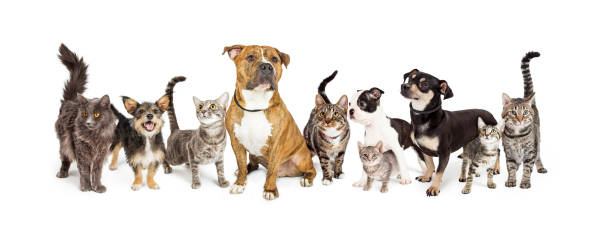

In [46]:
# Reading image form url
imageUrl = Image.open(requests.get('https://media.istockphoto.com/id/933909576/photo/row-of-cats-and-dogs-together-on-white.jpg?s=612x612&w=0&k=20&c=k-o6gYJpyn15O1qC2sNHbkzvLh6jkcKnTK8hQ4XmT9E=', stream=True).raw)
imageUrl

Berkas sudah ada
2  kucing ditemukan


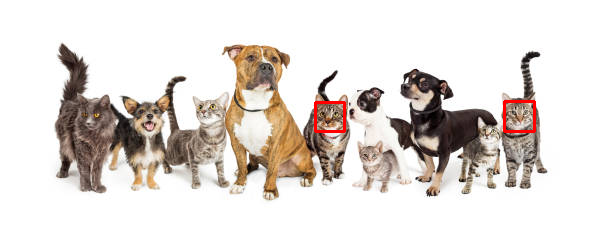

In [75]:
import os
import urllib.request as urlreq

# Image to array
image_arr = np.array(imageUrl)

# url haarcascade
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface_extended.xml"

# simpan berkas haarcascade
haarcascade = "haarcascade_frontalcatface_extended.xml"

# cek apakah berkas haarcascade sudah ada atau belum
if (haarcascade in os.listdir(os.curdir)):
    print("Berkas sudah ada")
else:
    # unduh berkas dari url dan simpan
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("Berkas telah terunduh")

# Cat Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)
cats = detector.detectMultiScale(image_arr)

# scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
# minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain i
# minSize – Minimum possible object size. Objects smaller than that are ignored.
# maxSize – Maximum possible object size. Objects bigger than this are ignored.

# jumlah kucing
jumlahKucing = 0

# loop deteksi
for (x,y,w,h) in cats:
  # gambar kotak pada muka kucing
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  jumlahKucing += 1


print(jumlahKucing, " kucing ditemukan")
Image.fromarray(image_arr)